In [ ]:
!pip install zod
!pip install "zod[all]"
!pip install "zod[cli]"

In [ ]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("../")

from typing import List

import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

# import the ZOD DevKit
from zod import ZodFrames

# import default constants
import zod.constants as constants
from zod.constants import Camera, Lidar, Anonymization, AnnotationProject

# import useful data classes
from zod.data_classes import LidarData

# NOTE! Set the path to dataset and choose a version
dataset_root = "/content/drive/MyDrive/Colab Notebooks/zodNew"  # your local path to zod
version = "mini"  # "mini" or "full"

# initialize ZodFrames
zod_frames = ZodFrames(dataset_root=dataset_root, version=version)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# get default training and validation splits
training_frames = zod_frames.get_split(constants.TRAIN)
validation_frames = zod_frames.get_split(constants.VAL)

# print the number of training and validation frames
print(f"Number of training frames: {len(training_frames)}")
print(f"Number of validation frames: {len(validation_frames)}")

# print out the first 5 training frames
print("The 5 first training frames have the ids:", sorted(list(training_frames))[:5])


Number of training frames: 10
Number of validation frames: 2
The 5 first training frames have the ids: ['009158', '018591', '023996', '029229', '044953']


In [ ]:
# we can get a specific frame by its id
frame_from_id = zod_frames["009158"]
# or via the index
frame_from_idx = zod_frames[9158]

# these two frames are the same
assert frame_from_id.info == frame_from_idx.info

In [ ]:
import pandas as pd

# Define the list of frame IDs
frame_ids_to_include = ['009158', '018591', '023996', '029229', '044953', '065838', '070221', '082291', '083430', '087912','007674','062592']

# Initialize an empty list to store metadata of selected frames
metadata_list = []

# Iterate over each frame ID
for frame_id in frame_ids_to_include:
    # Retrieve the frame using its ID
    zod_frame = zod_frames[frame_id]
    # Access the metadata of the frame
    metadata = zod_frame.metadata
    # Append metadata to the list
    metadata_list.append([
        metadata.frame_id,
        metadata.time,
        metadata.country_code,
        metadata.scraped_weather,
        metadata.collection_car,
        metadata.road_type,
        metadata.road_condition,
        metadata.time_of_day,
        metadata.num_lane_instances,
        metadata.num_vehicles,
        metadata.num_vulnerable_vehicles,
        metadata.num_pedestrians,
        metadata.num_traffic_lights,
        metadata.num_traffic_signs,
        metadata.longitude,
        metadata.latitude,
        metadata.solar_angle_elevation
    ])

# Create a DataFrame from the list of metadata
metadata_df = pd.DataFrame(metadata_list, columns=[
    "Frame ID", "Time", "Country Code", "Weather Condition", "Collection Car",
    "Road Type", "Road Condition", "Time of Day", "Number of Lanes",
    "Number of Vehicles", "Number of Vulnerable Vehicles", "Number of Pedestrians",
    "Number of Traffic Lights", "Number of Traffic Signs", "Longitude", "Latitude",
    "Solar Angle Elevation"
])

# Print the DataFrame
print(metadata_df)


   Frame ID                             Time Country Code  \
0    009158 2020-11-21 09:44:55.445654+00:00           DE   
1    018591 2020-07-24 07:08:56.778861+00:00           IT   
2    023996 2021-04-15 14:52:36.885711+00:00           PL   
3    029229 2021-05-02 14:22:06.780681+00:00           PL   
4    044953 2020-05-06 11:41:57.779576+00:00           SE   
5    065838 2020-10-10 10:42:09.883075+00:00           DE   
6    070221 2020-10-10 10:40:46.448060+00:00           DE   
7    082291 2021-04-20 23:17:20.001688+00:00           PL   
8    083430 2021-04-20 23:41:36.002429+00:00           PL   
9    087912 2020-10-29 14:47:10.887313+00:00           DE   
10   007674 2020-11-20 09:48:55.554068+00:00           DE   
11   062592 2021-01-17 11:19:08.447181+00:00           SE   

      Weather Condition Collection Car       Road Type Road Condition  \
0                cloudy          india            city         normal   
1                  rain          india            city      

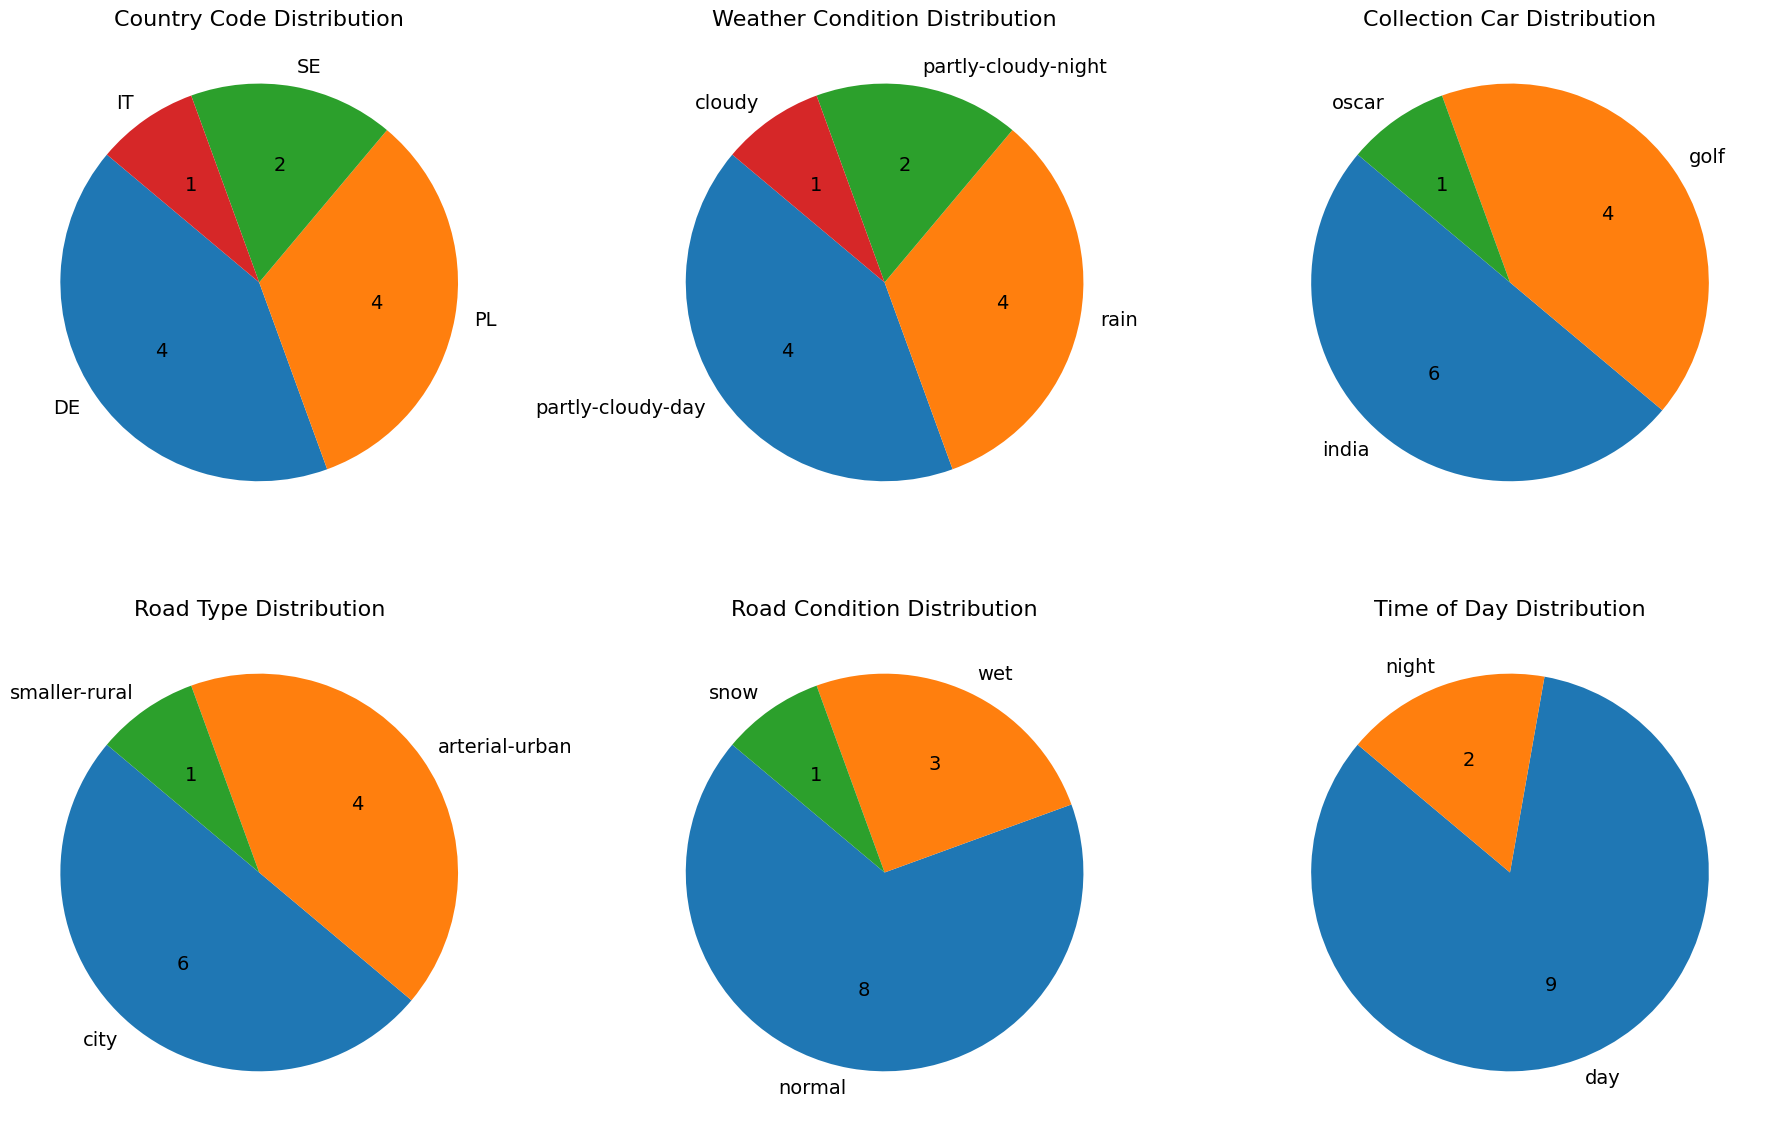

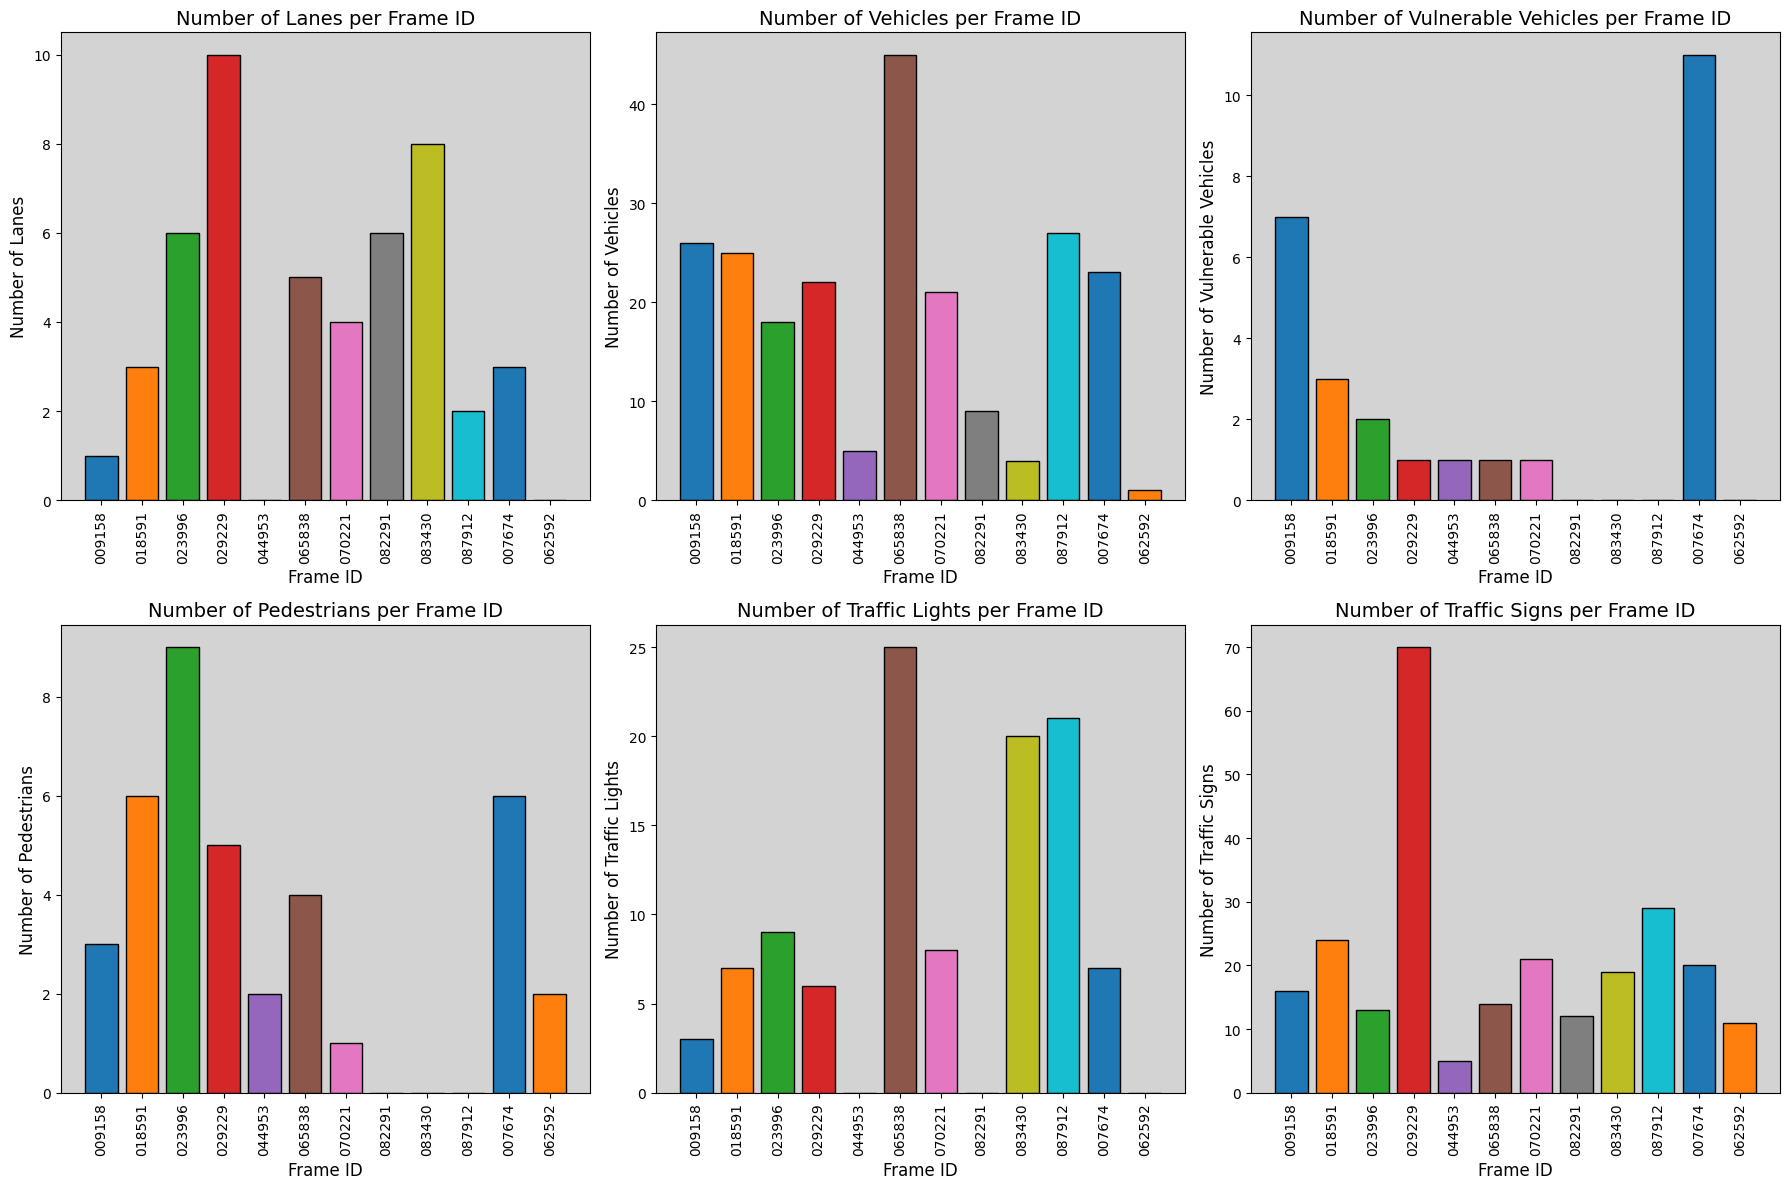

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataframe
data = pd.DataFrame({
    'Frame ID': ['009158', '018591', '023996', '029229', '044953', '065838', '070221', '082291', '083430', '087912', '007674', '062592'],
    'Time': ['2020-11-21 09:44:55.445654+00:00', '2020-07-24 07:08:56.778861+00:00', '2021-04-15 14:52:36.885711+00:00', '2021-05-02 14:22:06.780681+00:00', '2020-05-06 11:41:57.779576+00:00', '2020-10-10 10:42:09.883075+00:00', '2020-10-10 10:40:46.448060+00:00', '2021-04-20 23:17:20.001688+00:00', '2021-04-20 23:41:36.002429+00:00', '2020-10-29 14:47:10.887313+00:00', '2020-11-20 09:48:55.554068+00:00', '2021-01-17 11:19:08.447181+00:00'],
    'Country Code': ['DE', 'IT', 'PL', 'PL', 'SE', 'DE', 'DE', 'PL', 'PL', 'DE', 'DE', 'SE'],
    'Weather Condition': ['cloudy', 'rain', 'rain', 'rain', 'partly-cloudy-day', 'partly-cloudy-day', 'partly-cloudy-day', 'partly-cloudy-night', 'partly-cloudy-night', 'rain', 'partly-cloudy-day', 'partly-cloudy-day'],
    'Collection Car': ['india', 'india', 'india', 'golf', 'india', 'golf', 'golf', 'golf', 'oscar', 'golf', 'india', 'india'],
    'Road Type': ['city', 'city', 'city', 'city', 'city', 'arterial-urban', 'arterial-urban', 'arterial-urban', 'arterial-urban', 'arterial-urban', 'city', 'smaller-rural'],
    'Road Condition': ['normal', 'normal', 'wet', 'wet', 'normal', 'normal', 'normal', 'normal', 'normal', 'wet', 'normal', 'snow'],
    'Time of Day': ['day', 'day', 'day', 'day', 'day', 'day', 'day', 'night', 'night', 'day', 'day', 'day'],
    'Number of Lanes': [1, 3, 6, 10, 0, 5, 4, 6, 8, 2, 3, 0],
    'Number of Vehicles': [26, 25, 18, 22, 5, 45, 21, 9, 4, 27, 23, 1],
    'Number of Vulnerable Vehicles': [7, 3, 2, 1, 1, 1, 1, 0, 0, 0, 11, 0],
    'Number of Pedestrians': [3, 6, 9, 5, 2, 4, 1, 0, 0, 0, 6, 2],
    'Number of Traffic Lights': [3, 7, 9, 6, 0, 25, 8, 0, 20, 21, 7, 0],
    'Number of Traffic Signs': [16, 24, 13, 70, 5, 14, 21, 12, 19, 29, 20, 11],
    'Longitude': [6.935002, 9.155494, 21.011181, 20.999896, 17.633240, 8.740264, 8.745689, 21.069689, 19.940150, 7.005985, 6.914501, 20.643333],
    'Latitude': [50.942598, 45.467742, 52.200755, 52.230594, 59.853070, 50.122599, 50.124890, 52.230584, 50.036715, 51.467546, 50.931078, 67.145967],
    'Solar Angle Elevation': [16.011264, 30.966537, 23.857361, 32.236646, 45.873165, 32.465588, 32.423695, -24.919594, -26.281938, 10.267734, 16.526068, 2.385133]
})

# Convert Time column to datetime
data['Time'] = pd.to_datetime(data['Time'])

import matplotlib.pyplot as plt

# Function to plot pie charts with counts and larger labels
def plot_pie_chart(ax, data, column, title):
    counts = data[column].value_counts()
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=counts.index,
        autopct=lambda p: f'{int(p * sum(counts) / 100)}',
        startangle=140,
        colors=plt.cm.tab10.colors,
        textprops=dict(fontsize=12)  # Increase the font size for the labels
    )
    for text in texts:
        text.set_fontsize(14)  # Increase font size for category labels
    for autotext in autotexts:
        autotext.set_fontsize(14)  # Increase font size for count labels
    ax.set_title(title, fontsize=16)  # Increase font size for the title

# Create a 3x2 grid for the pie charts
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Plot each pie chart
plot_pie_chart(axs[0, 0], data, 'Country Code', 'Country Code Distribution')
plot_pie_chart(axs[0, 1], data, 'Weather Condition', 'Weather Condition Distribution')
plot_pie_chart(axs[0, 2], data, 'Collection Car', 'Collection Car Distribution')
plot_pie_chart(axs[1, 0], data, 'Road Type', 'Road Type Distribution')
plot_pie_chart(axs[1, 1], data, 'Road Condition', 'Road Condition Distribution')
plot_pie_chart(axs[1, 2], data, 'Time of Day', 'Time of Day Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Function to plot bar charts with larger labels
def plot_bar_chart(ax, data, column, title):
    ax.bar(data['Frame ID'], data[column], color=plt.cm.tab10.colors, edgecolor='black')
    ax.set_xlabel('Frame ID', fontsize=12)  # Increase font size for x-axis label
    ax.set_ylabel(column, fontsize=12)      # Increase font size for y-axis label
    ax.set_title(title, fontsize=14)        # Increase font size for title
    ax.tick_params(axis='x', labelrotation=90)  # Rotate x-axis labels for better readability
    ax.set_facecolor('lightgrey')


# Create a 3x2 grid for the bar charts
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Plot each bar chart
plot_bar_chart(axs[0, 0], data, 'Number of Lanes', 'Number of Lanes per Frame ID')
plot_bar_chart(axs[0, 1], data, 'Number of Vehicles', 'Number of Vehicles per Frame ID')
plot_bar_chart(axs[0, 2], data, 'Number of Vulnerable Vehicles', 'Number of Vulnerable Vehicles per Frame ID')
plot_bar_chart(axs[1, 0], data, 'Number of Pedestrians', 'Number of Pedestrians per Frame ID')
plot_bar_chart(axs[1, 1], data, 'Number of Traffic Lights', 'Number of Traffic Lights per Frame ID')
plot_bar_chart(axs[1, 2], data, 'Number of Traffic Signs', 'Number of Traffic Signs per Frame ID')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Create a DataFrame for the locations with solar angle elevation
locations = data[['Frame ID', 'Latitude', 'Longitude', 'Solar Angle Elevation']]

# Plot the map
fig = px.scatter_mapbox(
    locations,
    lat="Latitude",
    lon="Longitude",
    text="Frame ID",  # Add text labels for Frame ID
    hover_name="Frame ID",
    hover_data={"Latitude": False, "Longitude": False, "Solar Angle Elevation": True},
    color="Solar Angle Elevation",  # Color points by solar angle elevation
    color_continuous_scale=px.colors.cyclical.IceFire,  # Use a cyclical color scale
    size_max=15,
    zoom=3,
    height=600
)

# Update layout for better visualization
fig.update_layout(
    mapbox_style="carto-positron",
    margin={"r":0,"t":0,"l":0,"b":0},
    title="Frame Locations with Solar Angle Elevation"
)

# Update trace to show text labels and adjust marker properties
fig.update_traces(marker=dict(size=8, symbol='circle'), textposition='top center')

fig.show()


In [ ]:
# we can use the frame to get the OXTS of our the vehicle
zod_frame = zod_frames[29229]
oxts = zod_frame.oxts
print(f"Poses: {oxts.poses.shape}")
print(f"Velocities: {oxts.velocities.shape}")
print(f"Acceleration: {oxts.accelerations.shape}")
print(f"Angular rates: {oxts.angular_rates.shape}")
print(f"Timestamps: {oxts.timestamps.shape}")
print(f"origin_lat_lon: {oxts.origin_lat_lon}")




Poses: (2273, 4, 4)
Velocities: (2273, 3)
Acceleration: (2273, 3)
Angular rates: (2273, 3)
Timestamps: (2273,)
origin_lat_lon: (52.23118145350623, 20.999487104915772)


In [ ]:
# Example of printing the data in a more readable format
import pandas as pd

# Create a DataFrame to display the data in a tabular format
oxts_df = pd.DataFrame({
    "Timestamps": oxts.timestamps,
    "Acceleration X": oxts.accelerations[:, 0],
    "Acceleration Y": oxts.accelerations[:, 1],
    "Acceleration Z": oxts.accelerations[:, 2],
    "Velocity X": oxts.velocities[:, 0],
    "Velocity Y": oxts.velocities[:, 1],
    "Velocity Z": oxts.velocities[:, 2],
    "Angular Rate X": oxts.angular_rates[:, 0],
    "Angular Rate Y": oxts.angular_rates[:, 1],
    "Angular Rate Z": oxts.angular_rates[:, 2],
})

# Print the DataFrame
print(oxts_df)

        Timestamps  Acceleration X  Acceleration Y  Acceleration Z  \
0     1.619965e+09          0.5275         -0.4993         -9.9774   
1     1.619965e+09          0.4652         -0.4971         -9.9534   
2     1.619965e+09          0.3752         -0.5180        -10.0144   
3     1.619965e+09          0.3429         -0.4904         -9.9974   
4     1.619965e+09          0.4311         -0.4340         -9.9102   
...            ...             ...             ...             ...   
2268  1.619965e+09         -0.4002         -0.2840         -9.7952   
2269  1.619965e+09         -0.4393         -0.2070         -9.8032   
2270  1.619965e+09         -0.4633         -0.2998         -9.8952   
2271  1.619965e+09         -0.4569         -0.4382         -9.9104   
2272  1.619965e+09         -0.4542         -0.3861         -9.8607   

      Velocity X  Velocity Y  Velocity Z  Angular Rate X  Angular Rate Y  \
0      13.180257   -0.152764      0.0062       -0.308824       -0.307678   
1      

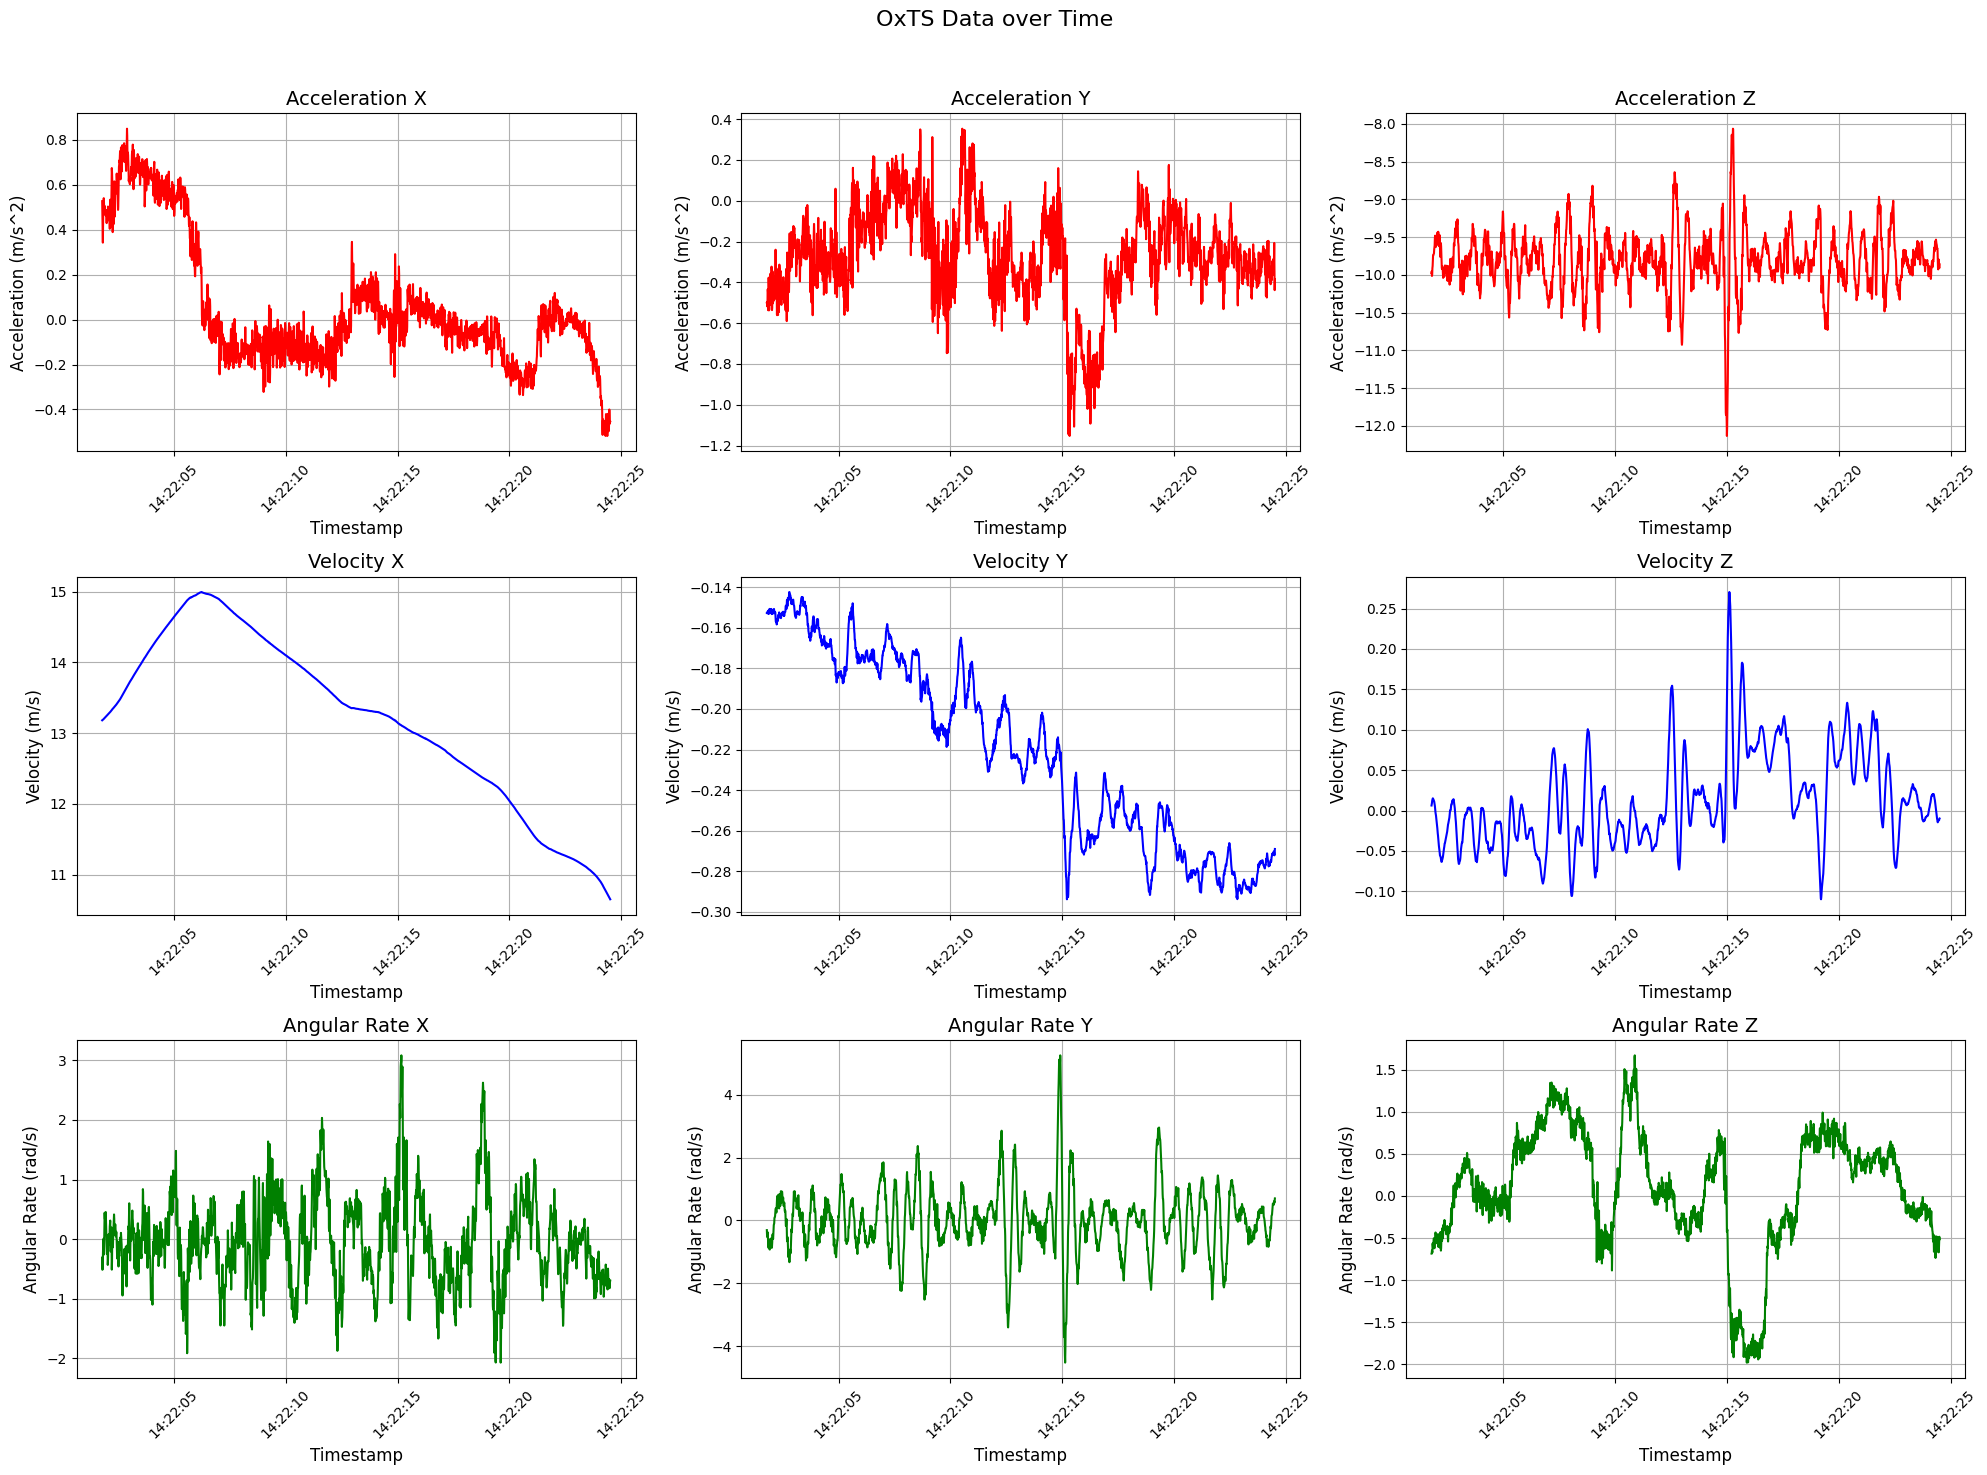

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define a function to plot individual time series data
def plot_individual_time_series(ax, time, data, title, y_label, color):
    ax.plot(time, data, color=color)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Timestamp', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.grid(True)

# Convert Unix timestamps to human-readable datetime format
def convert_timestamps(timestamps):
    return [datetime.utcfromtimestamp(ts) for ts in timestamps]

# Retrieve the OxTS data for a specific frame
oxts = zod_frame.oxts
time = convert_timestamps(oxts.timestamps)

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('OxTS Data over Time', fontsize=16)

# Colors for different types of data
acceleration_color = 'red'
velocity_color = 'blue'
angular_rate_color = 'green'

# Plot the accelerations
plot_individual_time_series(axs[0, 0], time, oxts.accelerations[:, 0], 'Acceleration X', 'Acceleration (m/s^2)', acceleration_color)
plot_individual_time_series(axs[0, 1], time, oxts.accelerations[:, 1], 'Acceleration Y', 'Acceleration (m/s^2)', acceleration_color)
plot_individual_time_series(axs[0, 2], time, oxts.accelerations[:, 2], 'Acceleration Z', 'Acceleration (m/s^2)', acceleration_color)

# Plot the velocities
plot_individual_time_series(axs[1, 0], time, oxts.velocities[:, 0], 'Velocity X', 'Velocity (m/s)', velocity_color)
plot_individual_time_series(axs[1, 1], time, oxts.velocities[:, 1], 'Velocity Y', 'Velocity (m/s)', velocity_color)
plot_individual_time_series(axs[1, 2], time, oxts.velocities[:, 2], 'Velocity Z', 'Velocity (m/s)', velocity_color)

# Plot the angular rates
plot_individual_time_series(axs[2, 0], time, oxts.angular_rates[:, 0], 'Angular Rate X', 'Angular Rate (rad/s)', angular_rate_color)
plot_individual_time_series(axs[2, 1], time, oxts.angular_rates[:, 1], 'Angular Rate Y', 'Angular Rate (rad/s)', angular_rate_color)
plot_individual_time_series(axs[2, 2], time, oxts.angular_rates[:, 2], 'Angular Rate Z', 'Angular Rate (rad/s)', angular_rate_color)

# Rotate x-axis labels for better readability and set font size
for ax in axs.flat:
    plt.sca(ax)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


In [ ]:
# we can use the frame to get the ego-motion of our the vehicle
# note that the ego-motion is a lightwieght version of the oxts data
zod_frame = zod_frames[23996]

ego_motion = zod_frame.ego_motion
print(f"Acceleration: {ego_motion.accelerations.shape}")
print(f"Velocities: {ego_motion.velocities.shape}")
print(f"Poses: {ego_motion.poses.shape}")
print(f"Timestamps: {ego_motion.timestamps.shape}")
print(f"Angular rates: {ego_motion.angular_rates.shape}")
print(f"origin_lat_lon: {ego_motion.origin_lat_lon}")

Acceleration: (22, 3)
Velocities: (22, 3)
Poses: (22, 4, 4)
Timestamps: (22,)
Angular rates: (22, 3)
origin_lat_lon: (52.20103405277463, 21.011055081167413)


In [ ]:
# Example of printing the data in a more readable format
import pandas as pd

zod_frame = zod_frames[23996]
ego_motion = zod_frame.ego_motion

# Create a DataFrame to display the data in a tabular format
ego_motion_df = pd.DataFrame({
    "Timestamps": ego_motion.timestamps,
    "Acceleration X": ego_motion.accelerations[:, 0],
    "Acceleration Y": ego_motion.accelerations[:, 1],
    "Acceleration Z": ego_motion.accelerations[:, 2],
    "Velocity X": ego_motion.velocities[:, 0],
    "Velocity Y": ego_motion.velocities[:, 1],
    "Velocity Z": ego_motion.velocities[:, 2],
    "Angular Rate X": ego_motion.angular_rates[:, 0],
    "Angular Rate Y": ego_motion.angular_rates[:, 1],
    "Angular Rate Z": ego_motion.angular_rates[:, 2],
})

# Print the DataFrame
print(ego_motion_df)

      Timestamps  Acceleration X  Acceleration Y  Acceleration Z  Velocity X  \
0   1.618498e+09       -0.131432       -0.230073       -9.871543    6.259910   
1   1.618498e+09       -0.147309       -0.203429       -9.699424    6.231383   
2   1.618498e+09       -0.086317       -0.017473       -9.747801    6.200777   
3   1.618498e+09       -0.027477        0.049175       -9.892322    6.180341   
4   1.618498e+09       -0.001929       -0.282870      -10.091214    6.157653   
5   1.618498e+09       -0.002074       -0.005823       -9.735663    6.135846   
6   1.618498e+09        0.197627       -0.023026       -9.534658    6.133519   
7   1.618498e+09        0.365128       -0.036216       -9.778379    6.144311   
8   1.618498e+09        0.660435       -0.002203      -10.000498    6.182289   
9   1.618498e+09        0.825719       -0.224898       -9.851033    6.251414   
10  1.618498e+09        0.794899       -0.214493       -9.793213    6.316971   
11  1.618498e+09        0.802080       -

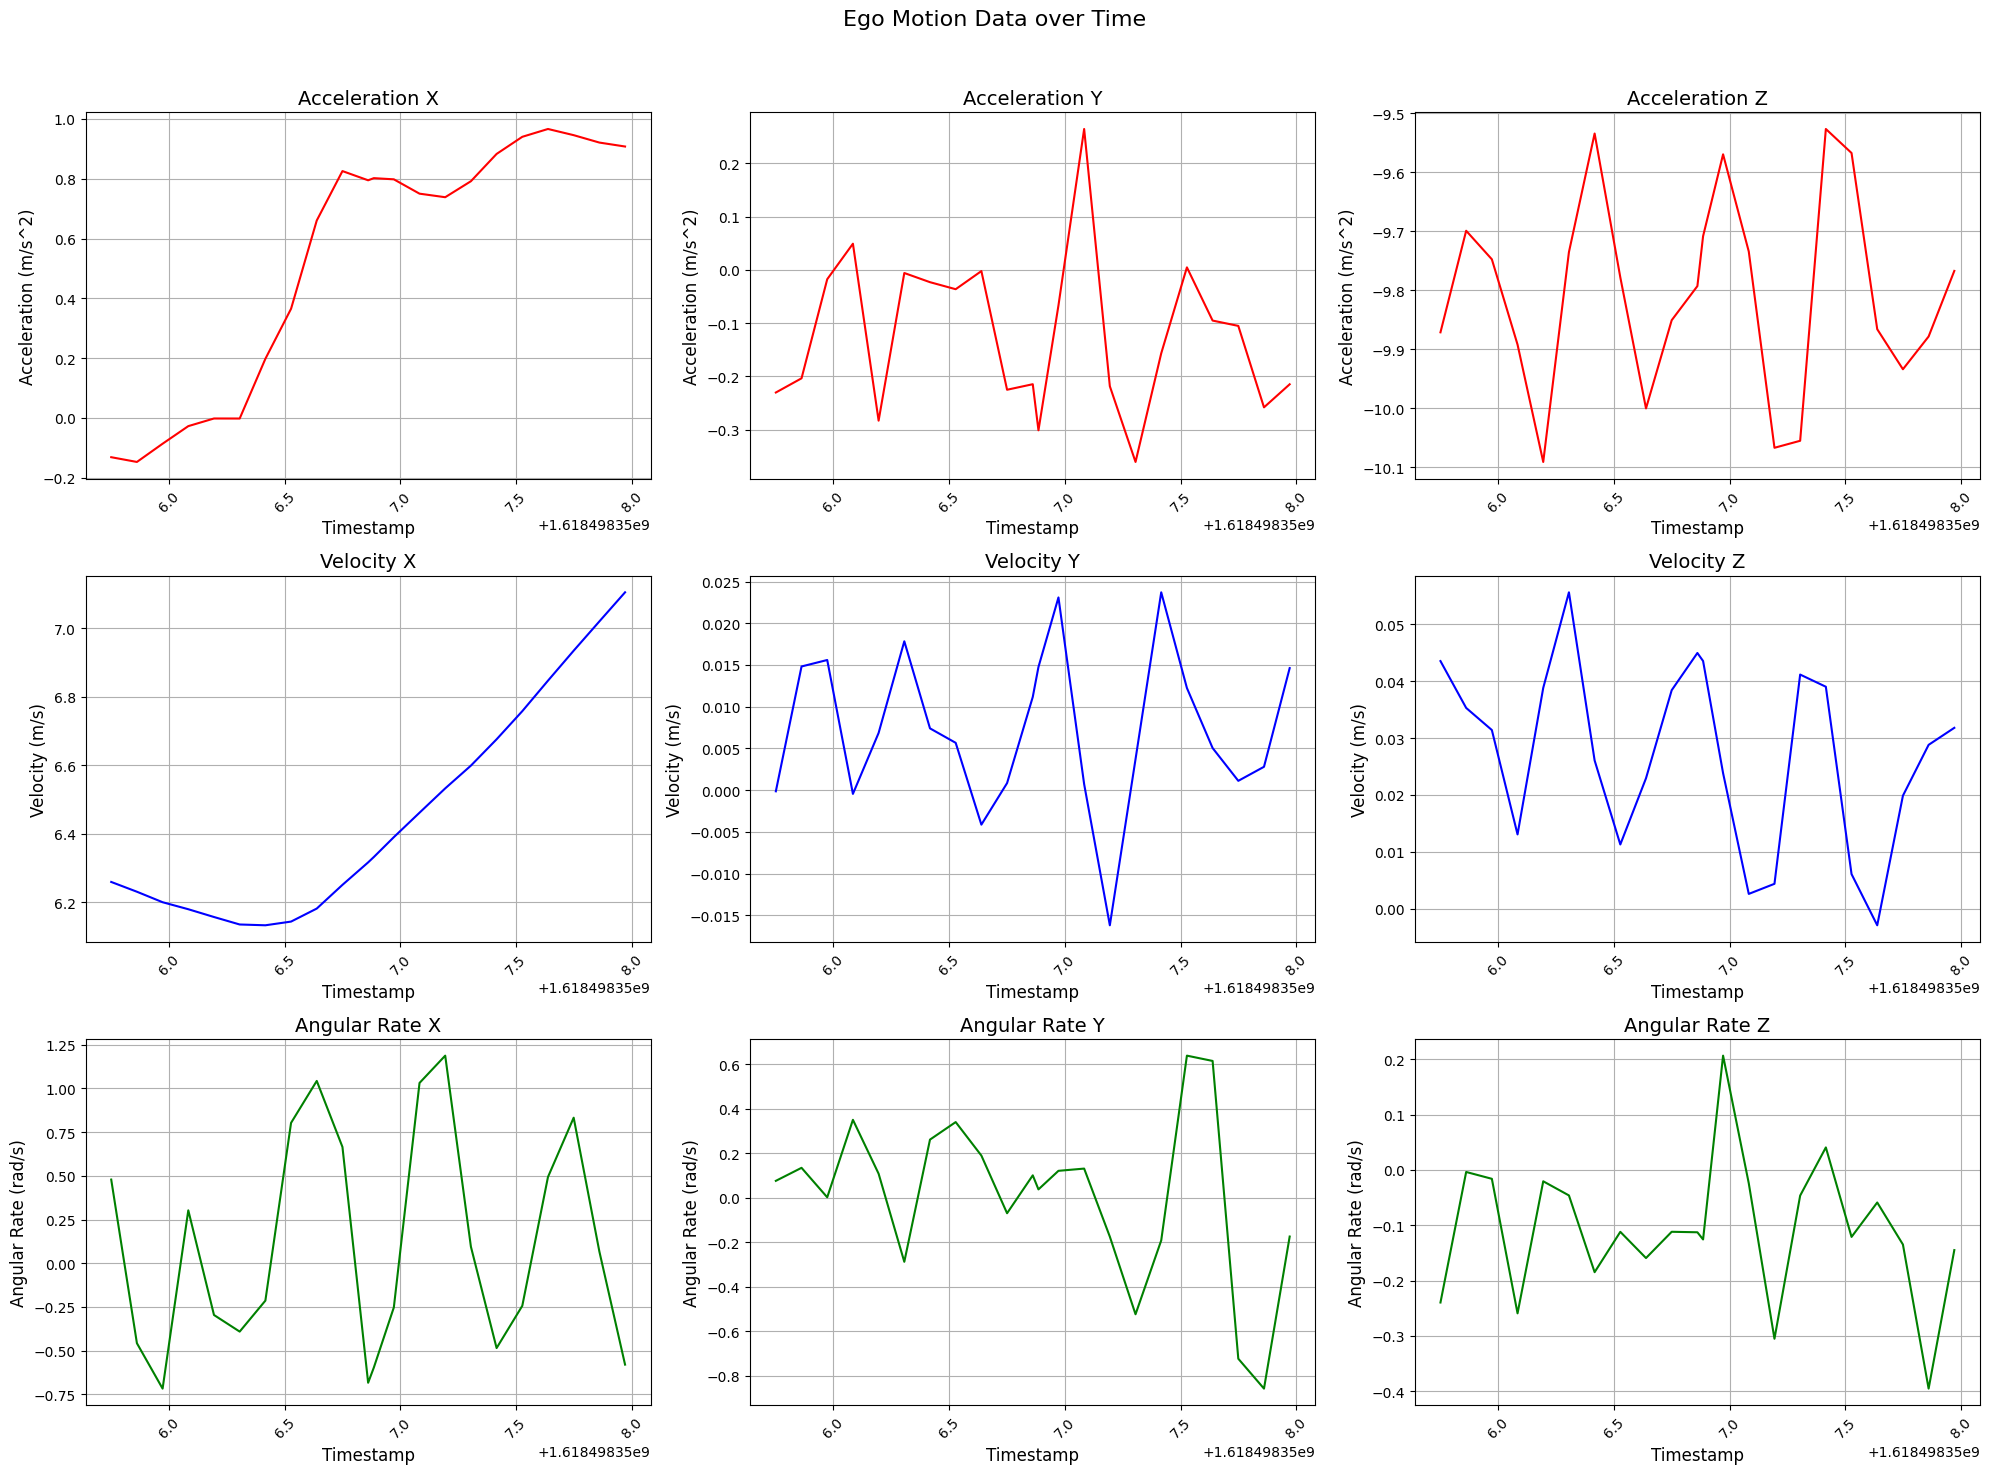

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define a function to plot individual time series data
def plot_individual_time_series(ax, time, data, title, y_label, color):
    ax.plot(time, data, color=color)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Timestamp', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.grid(True)

# Convert Unix timestamps to human-readable datetime format
def convert_timestamps(timestamps):
    return [datetime.utcfromtimestamp(ts) for ts in timestamps]

# Retrieve the ego motion data for a specific frame
ego_motion = zod_frame.ego_motion
time = ego_motion.timestamps

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Ego Motion Data over Time', fontsize=16)

# Colors for different types of data
acceleration_color = 'red'
velocity_color = 'blue'
angular_rate_color = 'green'

# Plot the accelerations
plot_individual_time_series(axs[0, 0], time, ego_motion.accelerations[:, 0], 'Acceleration X', 'Acceleration (m/s^2)', acceleration_color)
plot_individual_time_series(axs[0, 1], time, ego_motion.accelerations[:, 1], 'Acceleration Y', 'Acceleration (m/s^2)', acceleration_color)
plot_individual_time_series(axs[0, 2], time, ego_motion.accelerations[:, 2], 'Acceleration Z', 'Acceleration (m/s^2)', acceleration_color)

# Plot the velocities
plot_individual_time_series(axs[1, 0], time, ego_motion.velocities[:, 0], 'Velocity X', 'Velocity (m/s)', velocity_color)
plot_individual_time_series(axs[1, 1], time, ego_motion.velocities[:, 1], 'Velocity Y', 'Velocity (m/s)', velocity_color)
plot_individual_time_series(axs[1, 2], time, ego_motion.velocities[:, 2], 'Velocity Z', 'Velocity (m/s)', velocity_color)

# Plot the angular rates
plot_individual_time_series(axs[2, 0], time, ego_motion.angular_rates[:, 0], 'Angular Rate X', 'Angular Rate (rad/s)', angular_rate_color)
plot_individual_time_series(axs[2, 1], time, ego_motion.angular_rates[:, 1], 'Angular Rate Y', 'Angular Rate (rad/s)', angular_rate_color)
plot_individual_time_series(axs[2, 2], time, ego_motion.angular_rates[:, 2], 'Angular Rate Z', 'Angular Rate (rad/s)', angular_rate_color)

# Rotate x-axis labels for better readability and set font size
for ax in axs.flat:
    plt.sca(ax)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


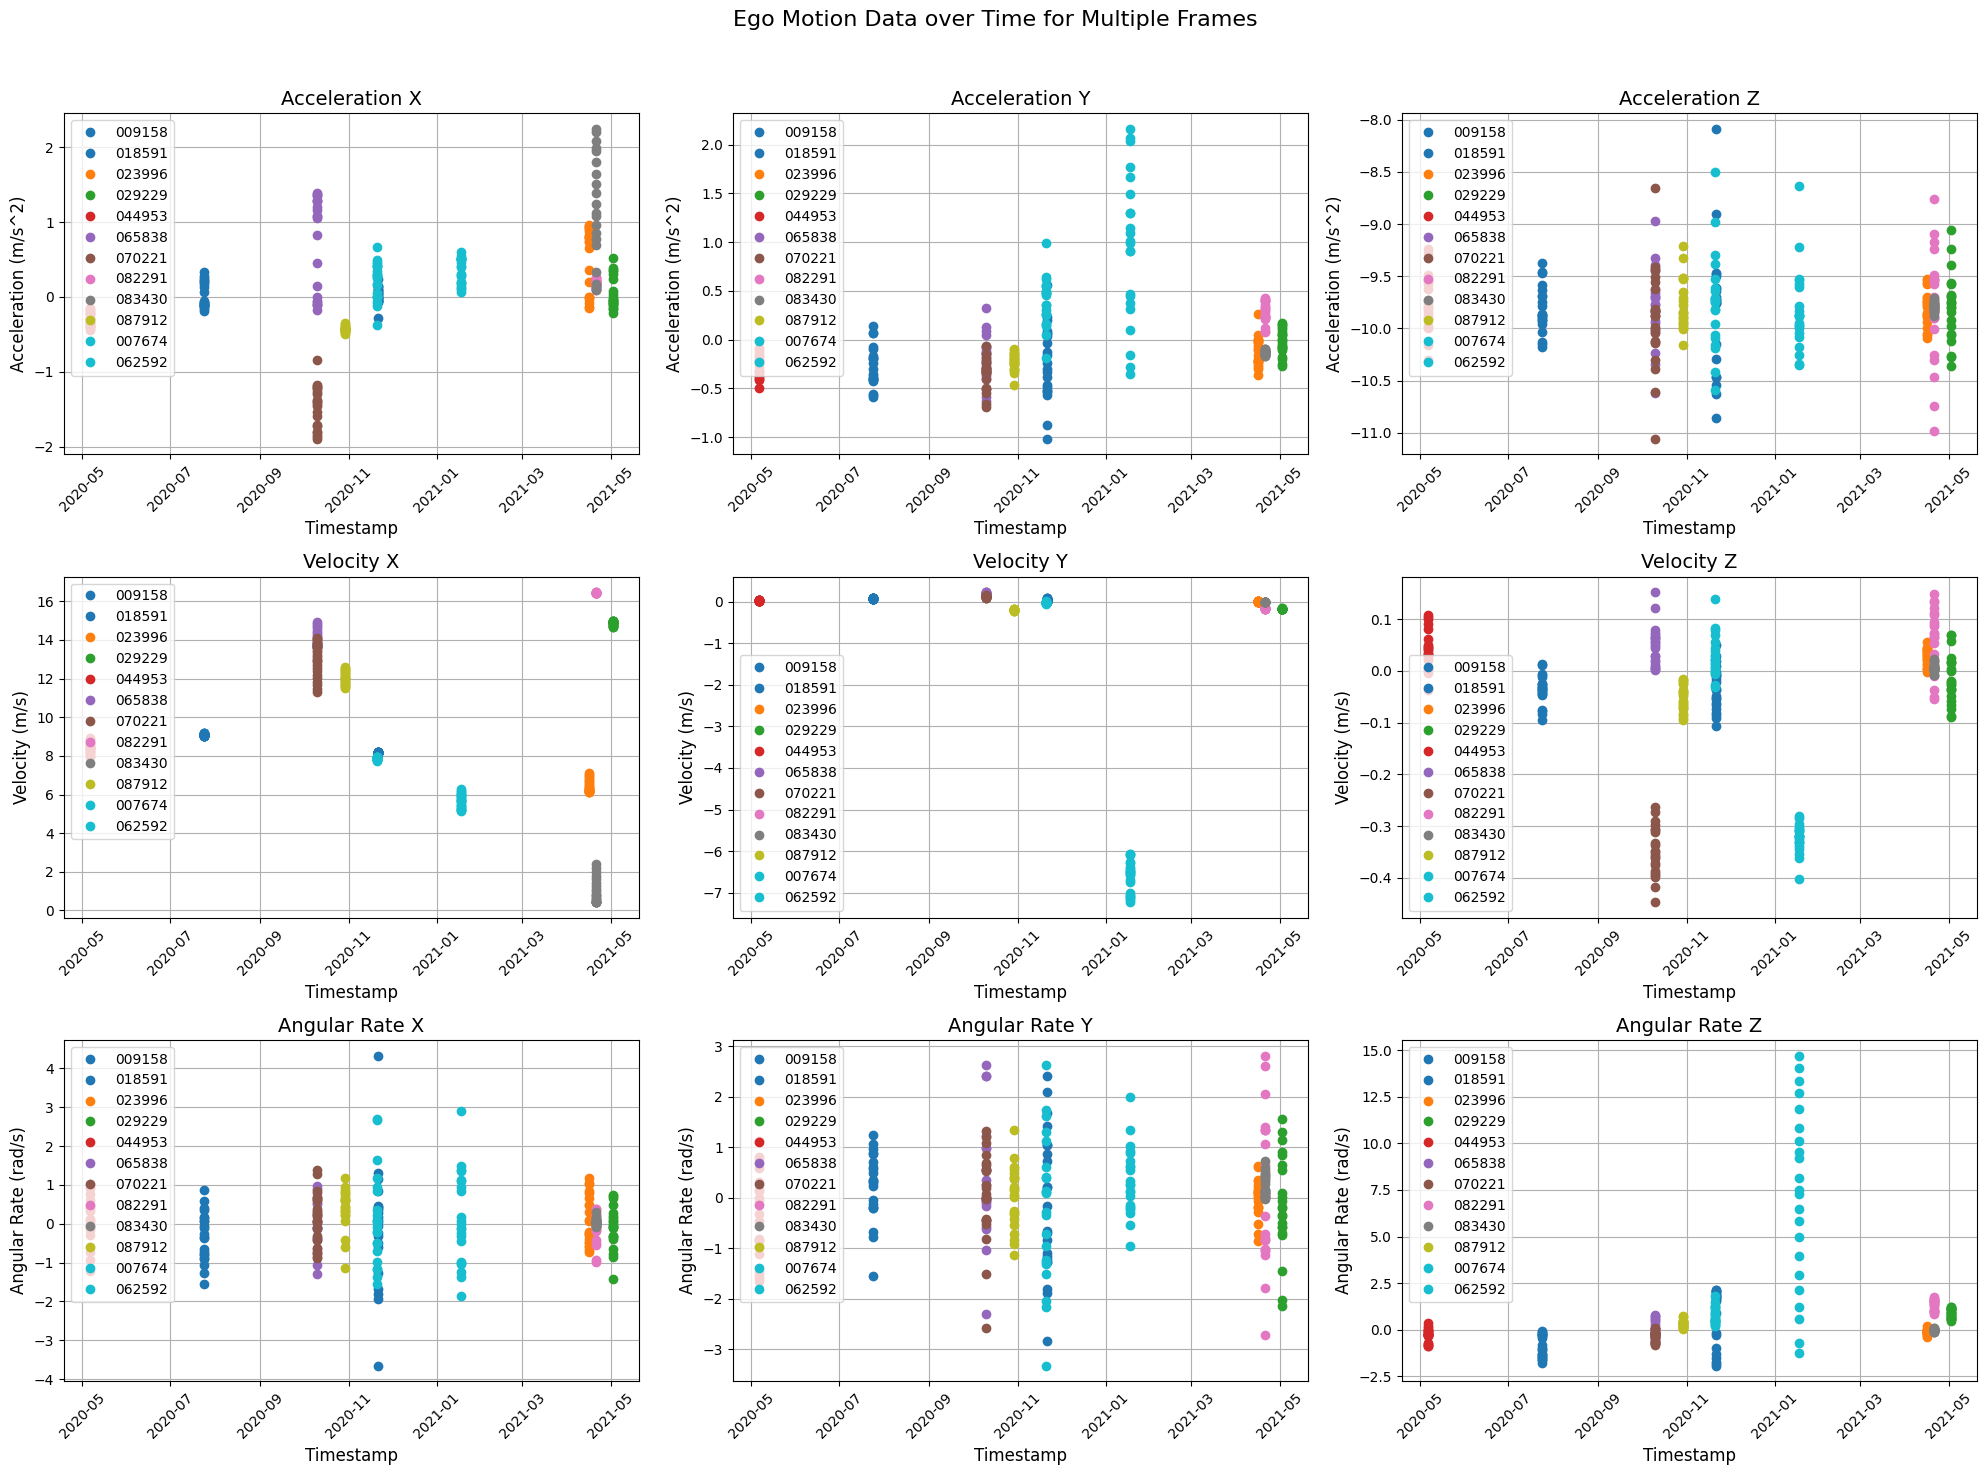

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define a function to plot individual time series data for multiple frames
def plot_multiple_time_series(ax, times, data, title, y_label, colors, labels):
    for i, (time, frame_data) in enumerate(zip(times, data)):
        ax.plot(time, frame_data, label=labels[i], color=colors[i], marker='o', linestyle='None')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Timestamp', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.grid(True)

# Convert Unix timestamps to human-readable datetime format
def convert_timestamps(timestamps):
    return [datetime.utcfromtimestamp(ts) for ts in timestamps]

# List of frame IDs to include
frame_ids_to_include = ['009158', '018591', '023996', '029229', '044953', '065838', '070221', '082291', '083430', '087912', '007674', '062592']

# Initialize lists to store time and ego motion data for each frame
all_times = []
all_accelerations = []
all_velocities = []
all_angular_rates = []
labels = []

# Loop through each frame ID and retrieve the data
for frame_id in frame_ids_to_include:
    zod_frame = zod_frames[frame_id]
    ego_motion = zod_frame.ego_motion
    time = convert_timestamps(ego_motion.timestamps)

    all_times.append(time)
    all_accelerations.append(ego_motion.accelerations)
    all_velocities.append(ego_motion.velocities)
    all_angular_rates.append(ego_motion.angular_rates)
    labels.append(frame_id)

# Use the tab10 colormap for different colors
colors = plt.cm.tab10(np.linspace(0, 1, len(frame_ids_to_include)))

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Ego Motion Data over Time for Multiple Frames', fontsize=16)

# Plot the accelerations
plot_multiple_time_series(axs[0, 0], all_times, [acc[:, 0] for acc in all_accelerations], 'Acceleration X', 'Acceleration (m/s^2)', colors, labels)
plot_multiple_time_series(axs[0, 1], all_times, [acc[:, 1] for acc in all_accelerations], 'Acceleration Y', 'Acceleration (m/s^2)', colors, labels)
plot_multiple_time_series(axs[0, 2], all_times, [acc[:, 2] for acc in all_accelerations], 'Acceleration Z', 'Acceleration (m/s^2)', colors, labels)

# Plot the velocities
plot_multiple_time_series(axs[1, 0], all_times, [vel[:, 0] for vel in all_velocities], 'Velocity X', 'Velocity (m/s)', colors, labels)
plot_multiple_time_series(axs[1, 1], all_times, [vel[:, 1] for vel in all_velocities], 'Velocity Y', 'Velocity (m/s)', colors, labels)
plot_multiple_time_series(axs[1, 2], all_times, [vel[:, 2] for vel in all_velocities], 'Velocity Z', 'Velocity (m/s)', colors, labels)

# Plot the angular rates
plot_multiple_time_series(axs[2, 0], all_times, [ang[:, 0] for ang in all_angular_rates], 'Angular Rate X', 'Angular Rate (rad/s)', colors, labels)
plot_multiple_time_series(axs[2, 1], all_times, [ang[:, 1] for ang in all_angular_rates], 'Angular Rate Y', 'Angular Rate (rad/s)', colors, labels)
plot_multiple_time_series(axs[2, 2], all_times, [ang[:, 2] for ang in all_angular_rates], 'Angular Rate Z', 'Angular Rate (rad/s)', colors, labels)

# Rotate x-axis labels for better readability and set font size
for ax in axs.flat:
    plt.sca(ax)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    ax.legend(fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


In [ ]:
# The upper-left 3x3 matrix is the rotation matrix
rotation_matrix = zod_frame.ego_motion.poses[0, :3, :3]
#print(rotation_matrix)

# The last column contain the translation
translation = zod_frame.ego_motion.poses[0, :3, -1]
#print(translation)

print(zod_frame.ego_motion.poses)

[[[ 5.25959883e-01 -8.49798259e-01  3.47724040e-02  2.48509262e+01]
  [ 8.50271060e-01  5.26340655e-01  2.15414155e-03 -5.62102544e+00]
  [-2.01327156e-02  2.84329768e-02  9.99392936e-01 -8.23569646e-01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[ 5.24424401e-01 -8.50745430e-01  3.48031797e-02  2.57666072e+01]
  [ 8.51193641e-01  5.24840628e-01  3.42067536e-03 -5.46532379e+00]
  [-2.11762466e-02  2.78303596e-02  9.99388332e-01 -8.82884128e-01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[ 5.24442541e-01 -8.50789522e-01  3.34247038e-02  2.66736234e+01]
  [ 8.51162773e-01  5.24876243e-01  5.18300636e-03 -5.31020715e+00]
  [-2.19534805e-02  2.57316746e-02  9.99427799e-01 -9.48985767e-01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[ 5.26099302e-01 -8.49807840e-01  3.23443820e-02  2.76056989e+01]
  [ 8.50142833e-01  5.26521812e-01  5.65206497e-03 -5.14985940e+00]
  [-2.18331917e-02  2.45237971e-02  9.9946

In [ ]:
#Summary
#Lidars: Contain extrinsic calibration parameters to transform points from the lidar's coordinate frame to the vehicle's coordinate frame.
#Cameras: Contain both extrinsic and intrinsic calibration parameters. Extrinsics describe the camera's position and orientation in the vehicle's coordinate frame, while intrinsics describe the camera's internal characteristics and lens distortions. Additionally, it includes image dimensions and field of view.
#This calibration information is crucial for sensor fusion, where data from multiple sensors are combined, enabling accurate perception and navigation.

# we can also get the calibrations
calibrations = zod_frame.calibration
print(calibrations)
#print(calibrations.lidars[Lidar.VELODYNE])
#print(calibrations.cameras[Camera.FRONT])

Calibration(lidars={<Lidar.VELODYNE: 'velodyne'>: LidarCalibration(extrinsics=Pose(transform=array([[-2.66972782e-02,  9.99642575e-01,  1.40631277e-03,
         1.05952156e+00],
       [-9.99622790e-01, -2.66876273e-02, -6.48452352e-03,
        -6.12873327e-03],
       [-6.44467464e-03, -1.57890142e-03,  9.99977986e-01,
         1.71154659e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])))}, cameras={<Camera.FRONT: 'front'>: CameraCalibration(extrinsics=Pose(transform=array([[ 0.00717325,  0.00832605,  0.99993961,  2.05513307],
       [-0.9998231 ,  0.01744657,  0.00702714, -0.00234948],
       [-0.01738701, -0.99981313,  0.00844973,  1.1285097 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])), intrinsics=array([[1.85561168e+03, 0.00000000e+00, 1.91878275e+03, 0.00000000e+00],
       [0.00000000e+00, 1.85561168e+03, 1.06901948e+03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]]), disto

In [ ]:
# get the camera core-frame from front camera with dnat anonymization
camera_core_frame = zod_frame.info.get_key_camera_frame(Anonymization.DNAT)
print(camera_core_frame)

{
  "filepath": "/content/drive/MyDrive/Colab Notebooks/zodNew/single_frames/062592/camera_front_dnat/062592_india_2021-01-17T11:19:08.447181Z.jpg",
  "time": "2021-01-17T11:19:08.447181Z",
  "height": 2168,
  "width": 3848
}


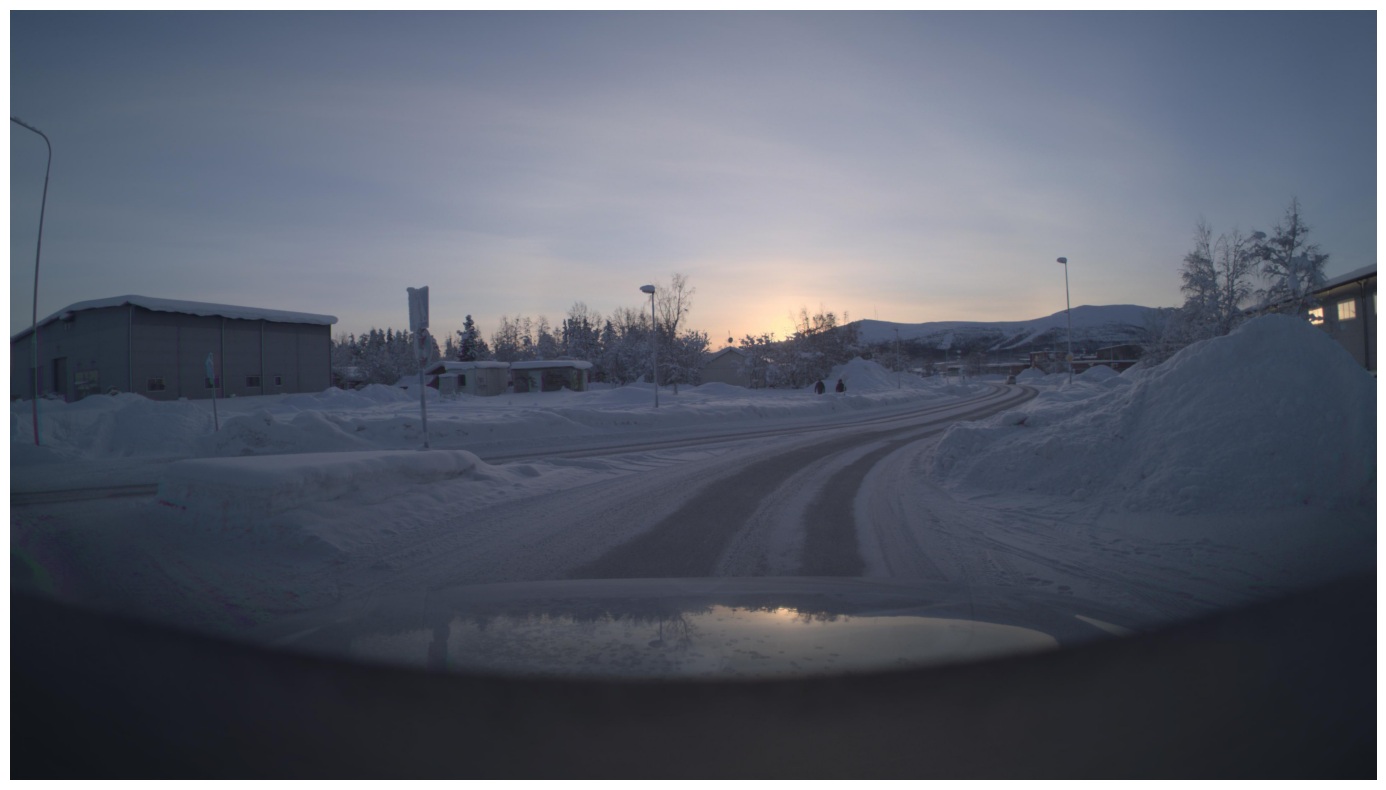

In [ ]:
# one can read the image from the filepath
image = camera_core_frame.read()
# or use a helper directly from the frame
image = zod_frame.get_image(Anonymization.DNAT)

plt.axis("off")
plt.imshow(image)
plt.show()

Number of points: 3114
Number of points in fov: 3082


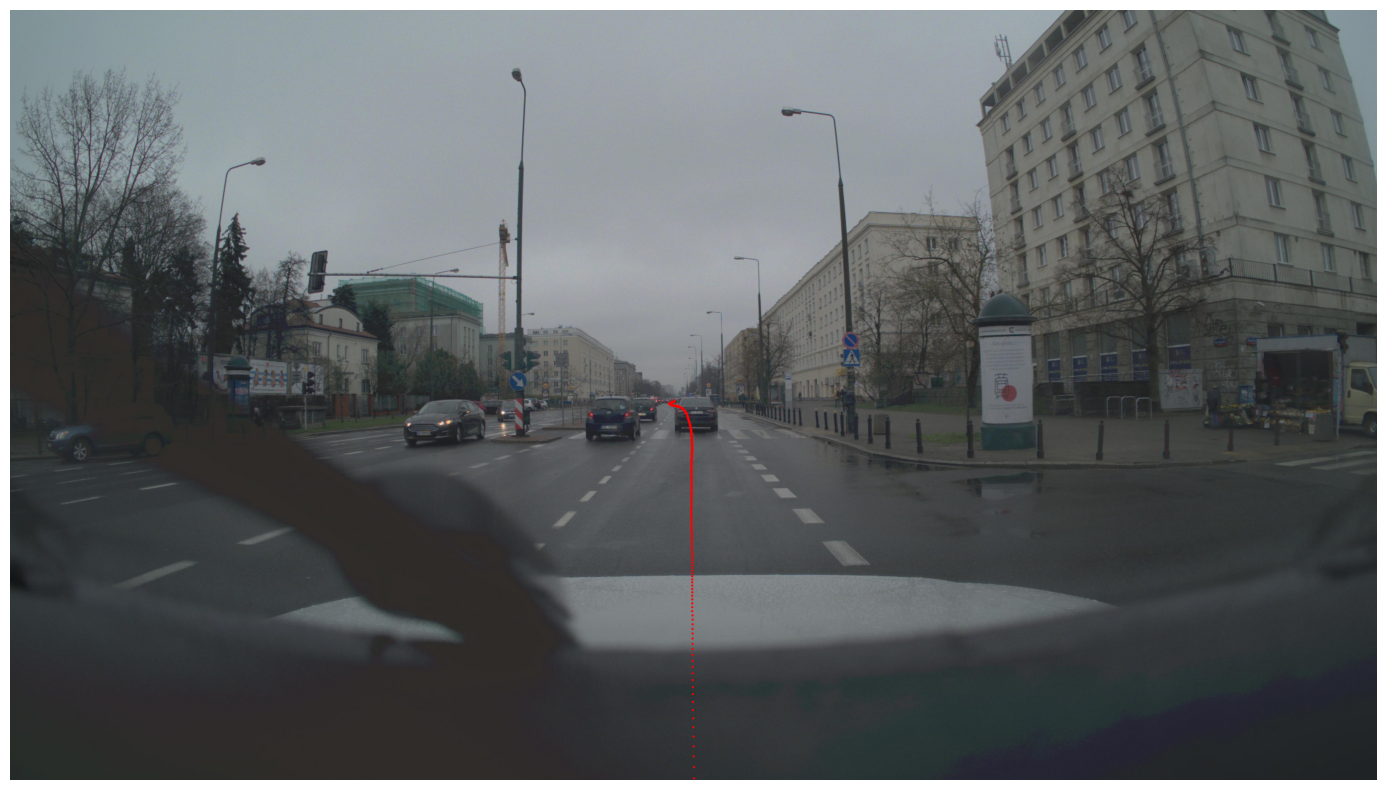

In [ ]:
from zod.visualization.oxts_on_image import visualize_oxts_on_image

zod_frame = zod_frames["023996"]

# extract the oxts data
oxts = zod_frame.oxts

# visualize the oxts data on the image
calibrations = zod_frame.calibration

# get the time of the keyframe (into which we want to project the oxts points)
key_timestamp = zod_frame.info.keyframe_time.timestamp()

image = zod_frame.get_image(Anonymization.DNAT)
image = visualize_oxts_on_image(oxts, key_timestamp, calibrations, image, camera=Camera.FRONT)

plt.axis("off")
plt.imshow(image)
plt.show()

In [ ]:
zod_frame = zod_frames[62592]

# get the lidar core-frame
lidar_core_frame = zod_frame.info.get_key_lidar_frame()
print(lidar_core_frame)

{
  "filepath": "/content/drive/MyDrive/Colab Notebooks/zodNew/single_frames/062592/lidar_velodyne/062592_india_2021-01-17T11:19:08.417696Z.npy",
  "time": "2021-01-17T11:19:08.417696Z",
  "isCompensated": false
}


In [ ]:
# load the lidar data
pc = lidar_core_frame.read()

# LidarData dataclass is a wrapper around several numpy arrays
assert isinstance(pc, LidarData)

# alternatively, we can use helper functions on the frame itself
assert zod_frame.get_lidar()[0] == pc
assert zod_frame.get_lidar_frames()[0].read() == pc

print(f"Points: {pc.points.shape}")  # x, y, z
print(f"Timestamps: {pc.timestamps.shape}")
print(f"Intensity: {pc.intensity.shape}")
print(f"Diode: {pc.diode_idx.shape}")

# TODO: add visualization, e.g. 3d scatter plot with plotly

Points: (223048, 3)
Timestamps: (223048,)
Intensity: (223048,)
Diode: (223048,)


In [ ]:
from zod import ObjectAnnotation

# get a new frame
zod_frame = zod_frames["082291"]

# get the object annotations
annotations: List[ObjectAnnotation] = zod_frame.get_annotation(AnnotationProject.OBJECT_DETECTION)

# get a single annotation object by index
idx = 31
print(f"Annotation: {annotations[idx].name}")

# there are both 2d and 3d annotations
annotation_2d = annotations[idx].box2d
annotation_3d = annotations[idx].box3d
print(annotation_2d)
print(annotation_3d)
# most objects, such as this one, have 3d annotations
assert annotation_3d is not None
# but some objects (small, far away, occluded) are not visible in the lidar, and thus lack 3d annotations
assert annotations[-1].box3d is None  # like this one

Annotation: Vehicle
Box2D(xyxy=array([1753.9 , 1074.95, 1887.03, 1209.96], dtype=float32), frame=<Camera.FRONT: 'front'>)
Box3D(center=array([-3.38932003, 38.7134852 , -0.56041962]), size=array([6.17122   , 2.28448417, 2.57618055]), orientation=Quaternion(0.7097492611432574, 0.003950360067184064, 0.003902715230673673, 0.7044325019302901), frame=<Lidar.VELODYNE: 'velodyne'>)


In [ ]:
from zod.visualization.object_visualization import overlay_object_2d_box_on_image, overlay_object_3d_box_on_image

# we can overlay the 2d annotation on the front camera image
camera_core_frame = zod_frame.info.get_key_camera_frame(Anonymization.DNAT)
image = camera_core_frame.read()

image = overlay_object_2d_box_on_image(image, annotation_2d, color=(255, 0, 0), line_thickness=10)

plt.figure()
plt.axis("off")
plt.imshow(image)

# we can also overlay the 3d annotation on the front camera image,
# but for this we also need the calibrations of the sensor
calibrations = zod_frame.calibration
assert annotation_3d is not None
image = overlay_object_3d_box_on_image(
    image, annotation_3d, calibrations, color=(255, 0, 0), line_thickness=10
)

plt.figure()
plt.axis("off")
plt.imshow(image)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

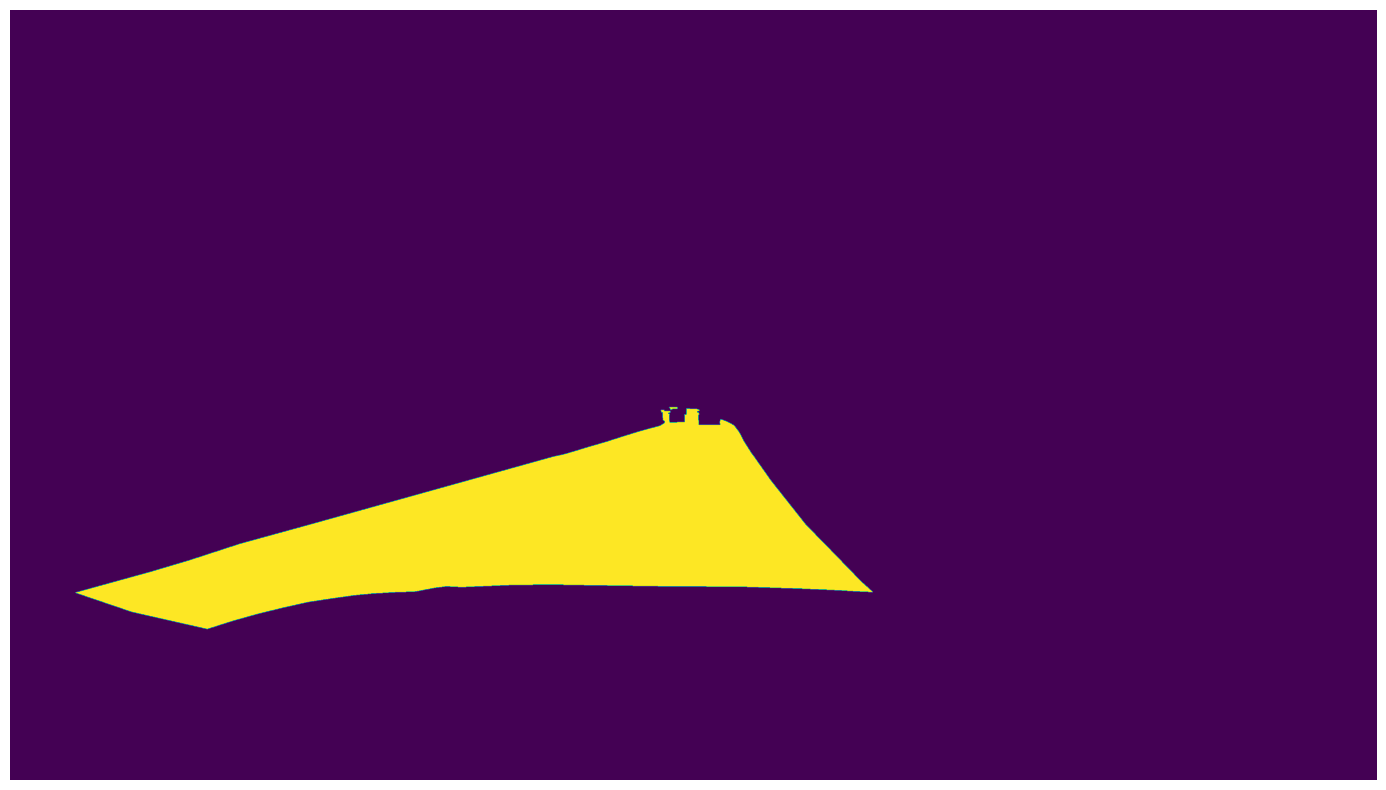

In [ ]:
from zod import EgoRoadAnnotation
from zod.utils.polygon_transformations import polygons_to_binary_mask

zod_frame = zod_frames[9158]

# get the ego road annotations and convert them to a binary mask
annotations: List[EgoRoadAnnotation] = zod_frame.get_annotation(AnnotationProject.EGO_ROAD)
polygons = [anno.geometry for anno in annotations]
mask = polygons_to_binary_mask(polygons)

# visualize the mask
plt.axis("off")
plt.imshow(mask)
plt.show()

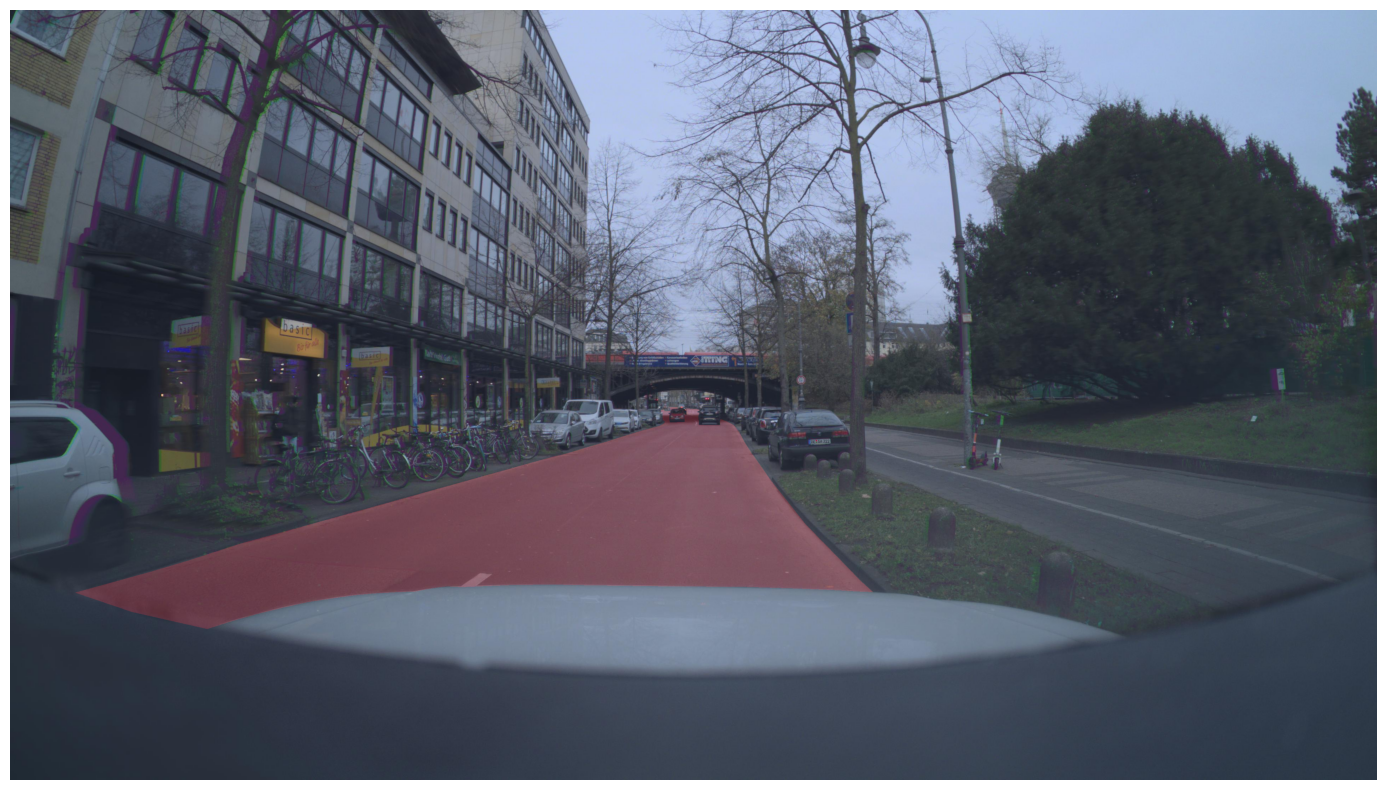

In [ ]:
# We can overlay the ego road annotations on the image
from zod.utils.polygon_transformations import polygons_to_binary_mask
from zod.visualization.polygon_utils import overlay_mask_on_image

zod_frame = zod_frames[9158]

# get the camera core-frame from front camera with dnat anonymization
camera_core_frame = zod_frame.info.get_key_camera_frame(Anonymization.DNAT)
image = camera_core_frame.read()

# get the ego road annotations and convert them to a binary mask
ego_road_annotations = zod_frame.get_annotation(AnnotationProject.EGO_ROAD)
ego_road_polygons = [anno.geometry for anno in ego_road_annotations]
mask = polygons_to_binary_mask(ego_road_polygons)

# overlay the mask on the image
image = overlay_mask_on_image(mask, image, fill_color=(100, 0, 0), alpha=0.5)

# visualize the mask
plt.axis("off")
plt.imshow(image)
plt.show()

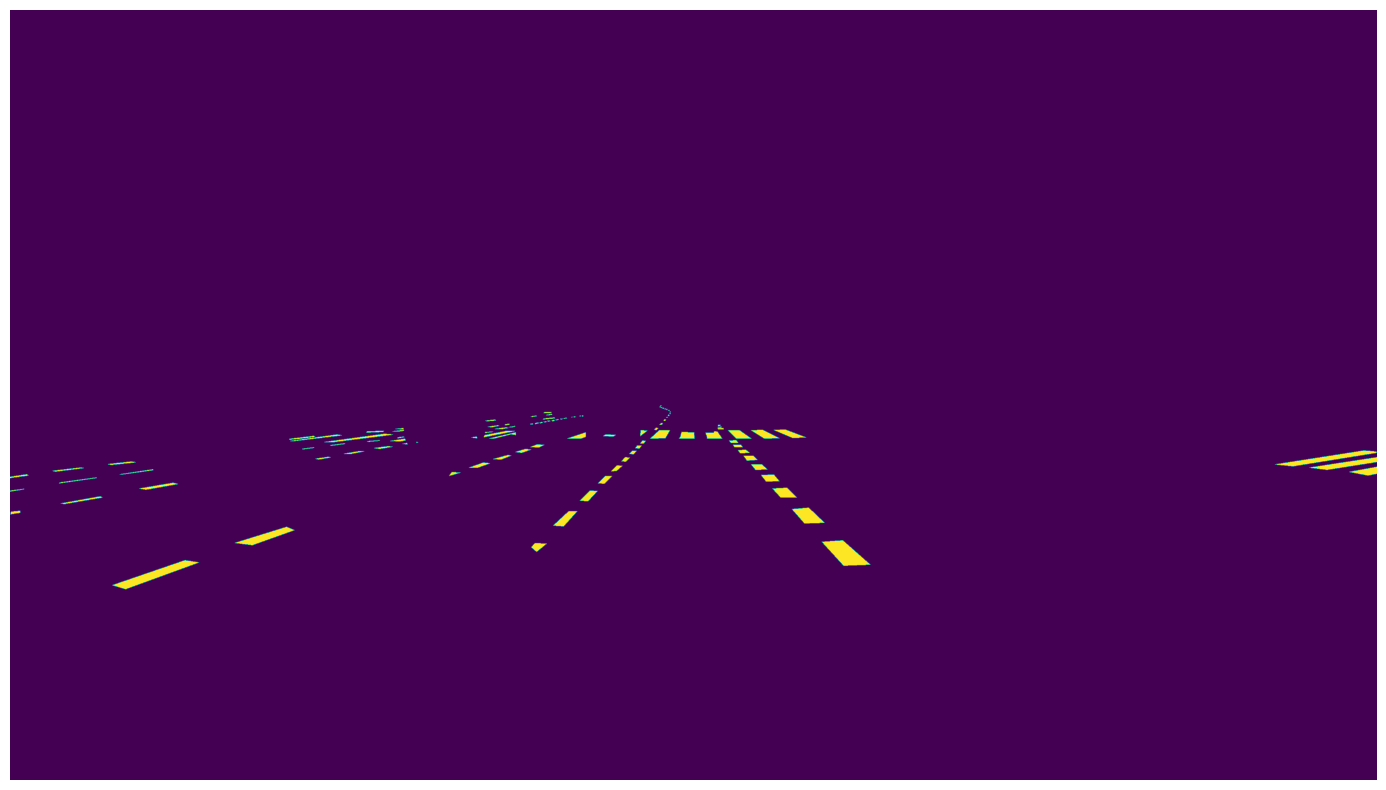

In [ ]:
from zod import LaneAnnotation

# get another frame
zod_frame = zod_frames[23996]

# get the lane markings annotations and convert to a binary mask
annotations: List[LaneAnnotation] = zod_frame.get_annotation(constants.AnnotationProject.LANE_MARKINGS)
polygons = [anno.geometry for anno in annotations]
mask = polygons_to_binary_mask(polygons)

# visualize the mask
plt.axis("off")
plt.imshow(mask)
plt.show()

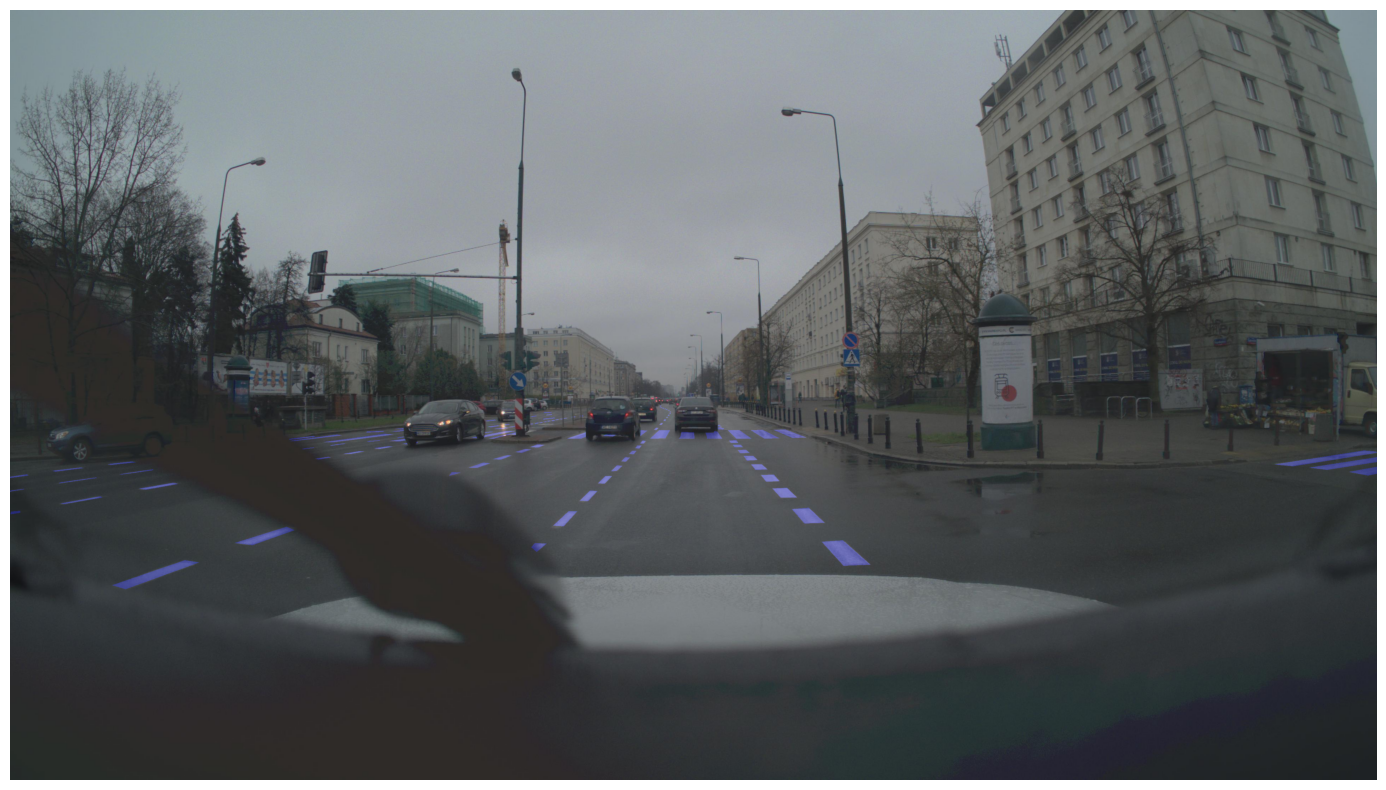

In [ ]:
# we can overlay the lane markings annotations on the image
zod_frame = zod_frames[23996]

# get the camera core-frame from front camera with dnat anonymization
camera_core_frame = zod_frame.info.get_key_camera_frame(Anonymization.DNAT)

# get the image
image = camera_core_frame.read()

# get the ego road annotations
lane_annotations = zod_frame.get_annotation(AnnotationProject.LANE_MARKINGS)
lane_polygons = [lane.geometry for lane in lane_annotations]

# convert the polygons to a binary mask (which can be used
# for ground truth in e.g. semantic segmentation)
mask = polygons_to_binary_mask(lane_polygons)

# overlay the mask on the image
image = overlay_mask_on_image(mask, image, fill_color=(0, 0, 100), alpha=0.75)

# visualize the mask
plt.axis("off")
plt.imshow(image)
plt.show()

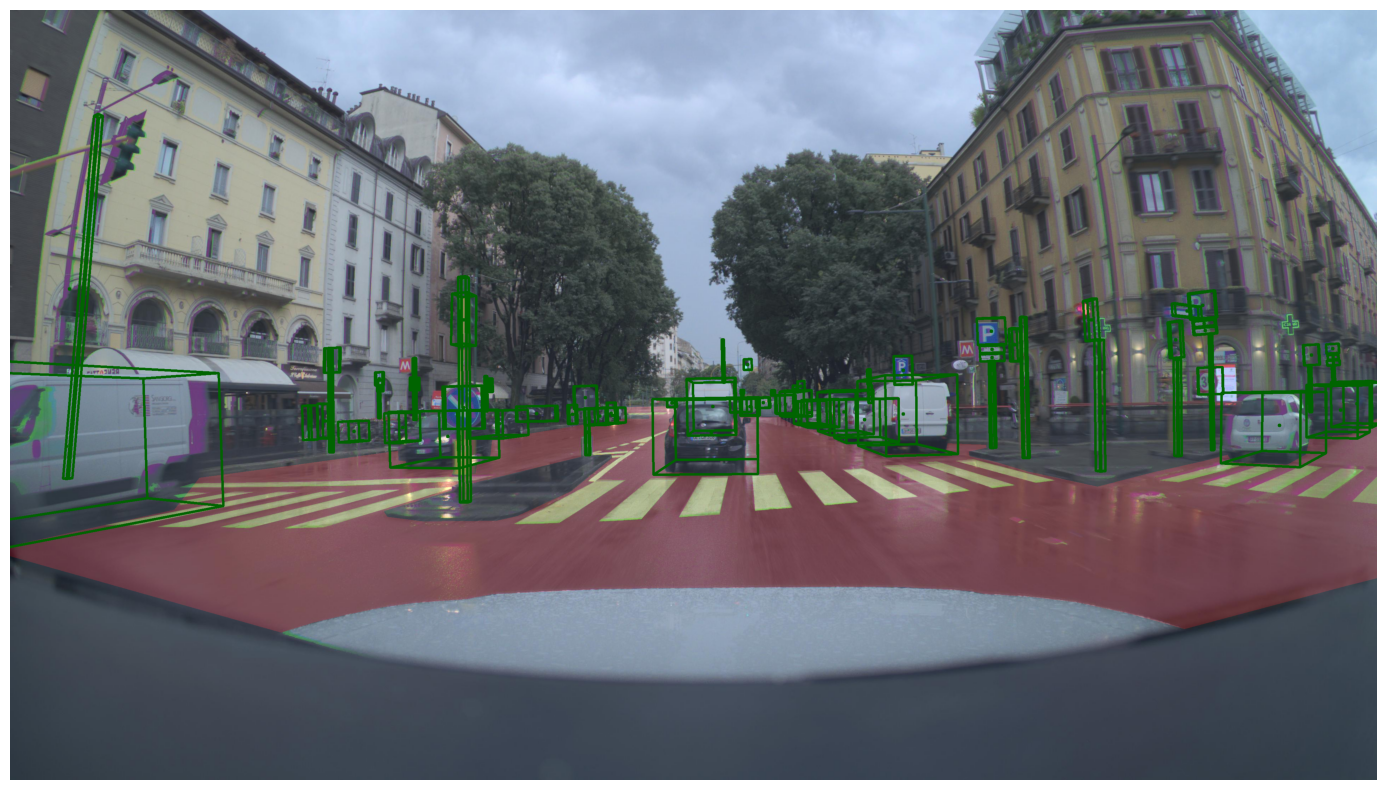

In [ ]:
# we can also visualize all together
zod_frame = zod_frames[18591]

pcd = zod_frame.get_aggregated_lidar(num_before=3)
lane_annotations: List[LaneAnnotation] = zod_frame.get_annotation(AnnotationProject.LANE_MARKINGS)
ego_road_annotations: List[EgoRoadAnnotation] = zod_frame.get_annotation(AnnotationProject.EGO_ROAD)
object_annotations: List[ObjectAnnotation] = zod_frame.get_annotation(AnnotationProject.OBJECT_DETECTION)

ego_road_mask = polygons_to_binary_mask([anno.geometry for anno in ego_road_annotations])
lane_mask = polygons_to_binary_mask([anno.geometry for anno in lane_annotations])
calibrations = zod_frame.calibration
image = zod_frame.get_image(Anonymization.DNAT)

# overlay the mask/annotation/pointcloud on the image
#image = visualize_lidar_on_image(pcd, calibrations, image)
image = overlay_mask_on_image(ego_road_mask, image, fill_color=(100, 0, 0), alpha=0.5)
image = overlay_mask_on_image(lane_mask, image, fill_color=(0, 100, 0), alpha=0.5)
for annotation in object_annotations:
    if annotation.box3d:
        image = overlay_object_3d_box_on_image(
            image, annotation.box3d, calibrations, color=(0, 100, 0), line_thickness=5
        )
plt.axis("off")
plt.imshow(image)
plt.show()

In [4]:
%cd /content/drive/MyDrive/Torrent/

/content/drive/MyDrive/Torrent


In [7]:
!zip -r dataset.zip "Hit Man (2023) [720p] [WEBRip] [YTS.MX]/"

  adding: Hit Man (2023) [720p] [WEBRip] [YTS.MX]/ (stored 0%)
  adding: Hit Man (2023) [720p] [WEBRip] [YTS.MX]/www.YTS.MX.jpg (deflated 4%)
  adding: Hit Man (2023) [720p] [WEBRip] [YTS.MX]/YIFYStatus.com.txt (deflated 41%)
  adding: Hit Man (2023) [720p] [WEBRip] [YTS.MX]/Hit.Man.2023.720p.WEBRip.x264.AAC-[YTS.MX].mp4 (deflated 0%)


In [8]:
from google.colab import files
files.download('dataset.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>